In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/content/mall-customers-data.csv")

display(df.head())
display(df.corr(numeric_only=True))

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,customer_id,age,annual_income,spending_score
customer_id,1.000000,-0.026763,0.977548,0.013835
age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


Text(17.31944444444445, 0.5, 'Count')

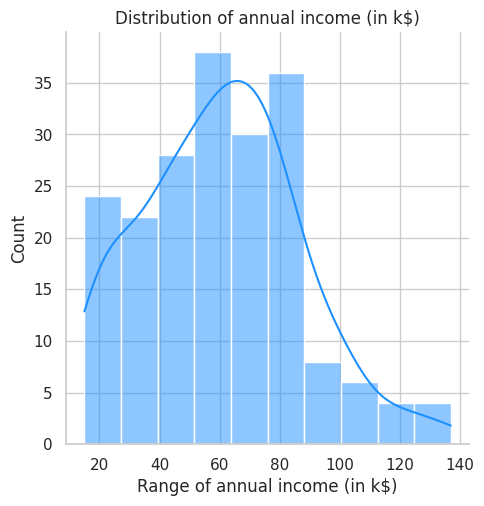

In [3]:
# distribution of annual income
sns.set(style="whitegrid")
sns.displot(df["annual_income"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

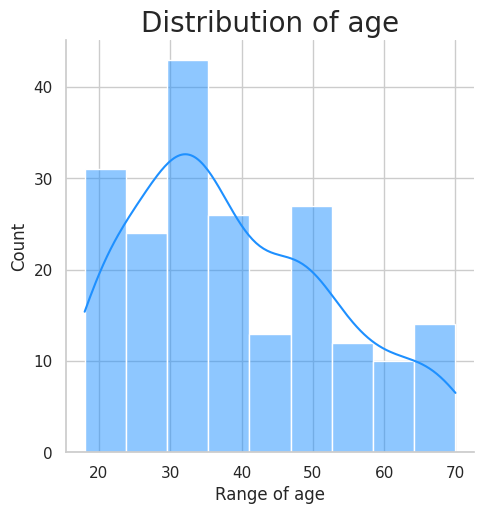

In [4]:
# distribution of age
sns.set(style="whitegrid")
sns.displot(df["age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

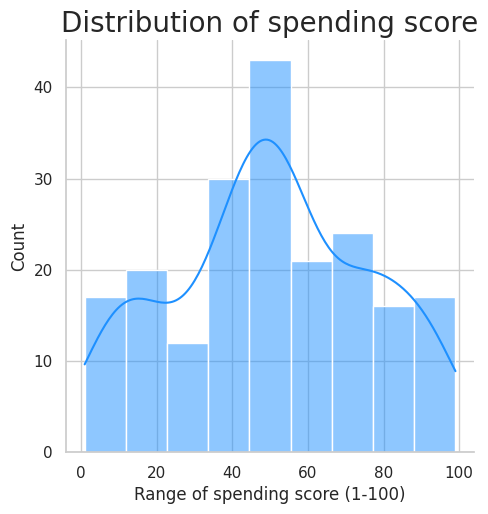

In [5]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["spending_score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

<ipython-input-6-cabc7f68b645>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


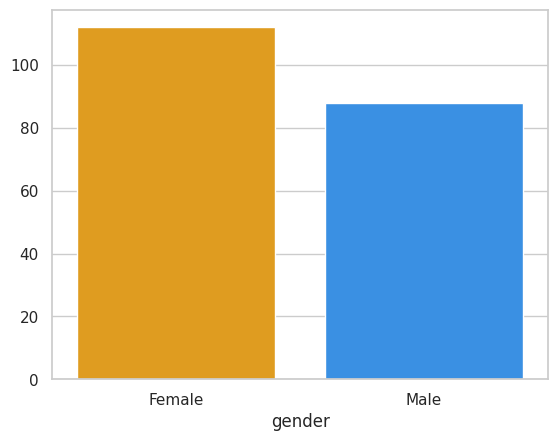

In [6]:
# gender analysis
genders = df["gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [7]:
# considering two features: annual income and spending score
X = df[["annual_income", "spending_score"]]
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


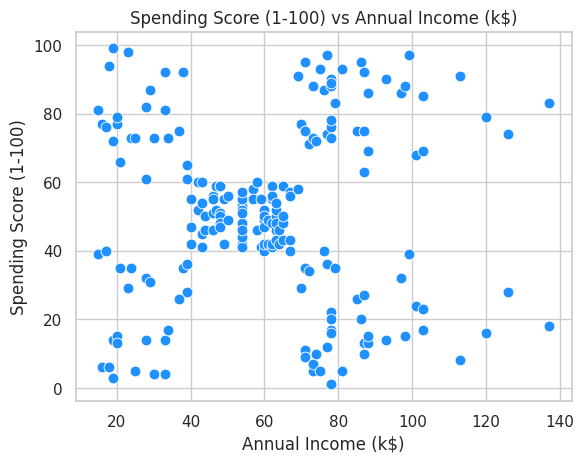

In [8]:
# scatterplot of the above data
sns.scatterplot(x="annual_income", y="spending_score", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

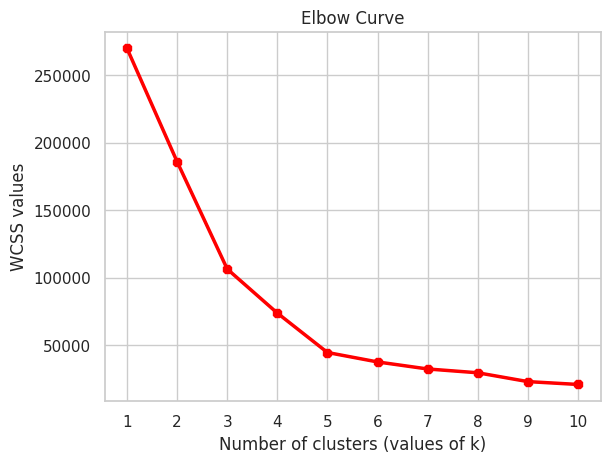

In [9]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [10]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

,customer_id,gender,age,annual_income,spending_score,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


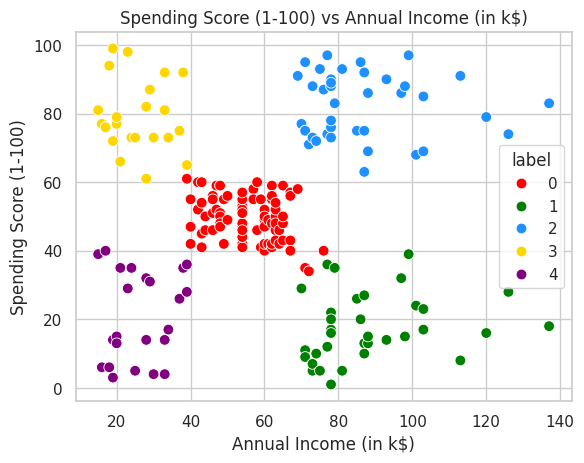

In [11]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="annual_income",
    y="spending_score",
    hue="label",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()